In [1]:
import sys
sys.path.append("..")
import aux.models as aux
import ciw
import scipy.stats
import matplotlib.pyplot as plt

# Check overall cdf fits

In [2]:
M = aux.MM1PS(10, 8, infty=100)

In [3]:
M.W(1)

0.13817076911413245

In [4]:
M.W(2)

0.04401905989447897

In [5]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(8)],
    service_distributions=[ciw.dists.Exponential(10)],
    number_of_servers=[float('inf')]
)

In [6]:
ciw.seed(0)
Q = ciw.Simulation(N, node_class=ciw.PSNode)
Q.simulate_until_max_time(2000)

In [7]:
recs = Q.get_all_records()

In [8]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 0)) / 100

1.0

In [9]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 1)) / 100

0.12459781717241811

In [10]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs], 2)) / 100

0.040943789035392086

In [11]:
xs = [0.2*i for i in range(10)]

In [12]:
experimental = [(100 - scipy.stats.percentileofscore([r.service_time for r in recs], x)) / 100 for x in xs]

In [13]:
theoretical = [M.W(x) for x in xs]

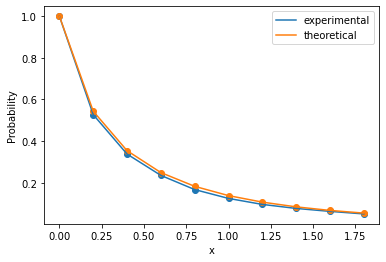

In [14]:
fig, ax = plt.subplots(1)
ax.plot(xs, experimental, label='experimental')
ax.scatter(xs, experimental)
ax.plot(xs, theoretical, label='theoretical')
ax.scatter(xs, theoretical)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.show()

# Check state dependent

In [15]:
M = aux.MM1PS(10, 8, infty=100)

In [16]:
M.wn(1, 1)

0.03671570788719885

In [17]:
M.wn(1, 0)

0.018588538353597812

In [18]:
M.wn(1, 2)

0.06127040729783575

In [19]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(8)],
    service_distributions=[ciw.dists.Exponential(10)],
    number_of_servers=[float('inf')]
)

In [20]:
ciw.seed(0)
Q = ciw.Simulation(N, node_class=ciw.PSNode)
Q.simulate_until_max_time(2000)

In [21]:
recs = Q.get_all_records()

In [22]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs if r.queue_size_at_arrival == 1], 1)) / 100

0.03207547169811321

In [23]:
(100 - scipy.stats.percentileofscore([r.service_time for r in recs if r.queue_size_at_arrival == 2], 1)) / 100

0.062033582089552224

In [24]:
experimental= [[(100 - scipy.stats.percentileofscore([r.service_time for r in recs if r.queue_size_at_arrival == n], x)) / 100 for x in xs] for n in range(4)]

In [25]:
theoretical = [[M.wn(x, n) for x in xs] for n in range(4)]

In [26]:
fig, axarr = plt.subplots(1, 4, figsize=(16, 5))
for n in range(4):
    axarr[n].plot(xs, experimental[n], label='experimental')
    axarr[n].scatter(xs, experimental[n])
    axarr[n].plot(xs, theoretical[n], label='theoretical')
    axarr[n].scatter(xs, theoretical[n])
    axarr[n].legend()
    axarr[n].set_xlabel('x')
    axarr[n].set_ylabel('Probability')
    axarr[n].set_title(f'n = {n}')
plt.show()

In [27]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(2.9)],
    service_distributions=[ciw.dists.Exponential(3)],
    number_of_servers=[float('inf')]
)

In [28]:
ciw.seed(0)
Q = ciw.Simulation(N, node_class=ciw.PSNode)
Q.simulate_until_max_time(20000)

In [29]:
recs = Q.get_all_records()

In [30]:
experimental= [[(100 - scipy.stats.percentileofscore([r.service_time for r in recs if r.queue_size_at_arrival == n], x)) / 100 for x in xs] for n in range(4)]

In [31]:
M = aux.MM1PS(3, 2.9, infty=150)

In [32]:
theoretical = [[M.wn(x, n) for x in xs] for n in range(4)]

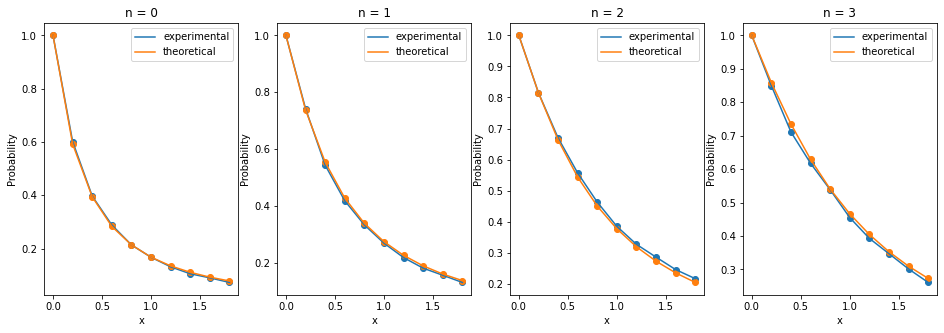

In [33]:
fig, axarr = plt.subplots(1, 4, figsize=(16, 5))
for n in range(4):
    axarr[n].plot(xs, experimental[n], label='experimental')
    axarr[n].scatter(xs, experimental[n])
    axarr[n].plot(xs, theoretical[n], label='theoretical')
    axarr[n].scatter(xs, theoretical[n])
    axarr[n].legend()
    axarr[n].set_xlabel('x')
    axarr[n].set_ylabel('Probability')
    axarr[n].set_title(f'n = {n}')
plt.show()

In [34]:
experimentalagg = [(100 - scipy.stats.percentileofscore([r.service_time for r in recs], x)) / 100 for x in xs]
theoreticalagg = [M.W(x) for x in xs]

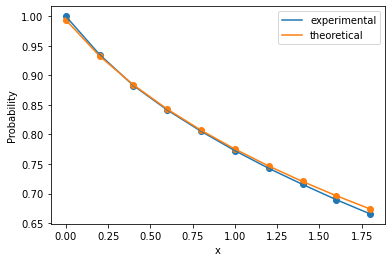

In [35]:
fig, ax = plt.subplots(1)
ax.plot(xs, experimentalagg, label='experimental')
ax.scatter(xs, experimentalagg)
ax.plot(xs, theoreticalagg, label='theoretical')
ax.scatter(xs, theoreticalagg)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.show()